# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético).

### 1. Carga las librerias que consideres comunes al notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

df = pd.read_csv(url, names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.nunique()

preg      17
plas     136
pres      47
skin      51
test     186
mass     248
pedi     517
age       52
class      2
dtype: int64

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00
Predicción,768.0,0.287760,0.453014,0.000,0.00000,0.0000,1.00000,1.00


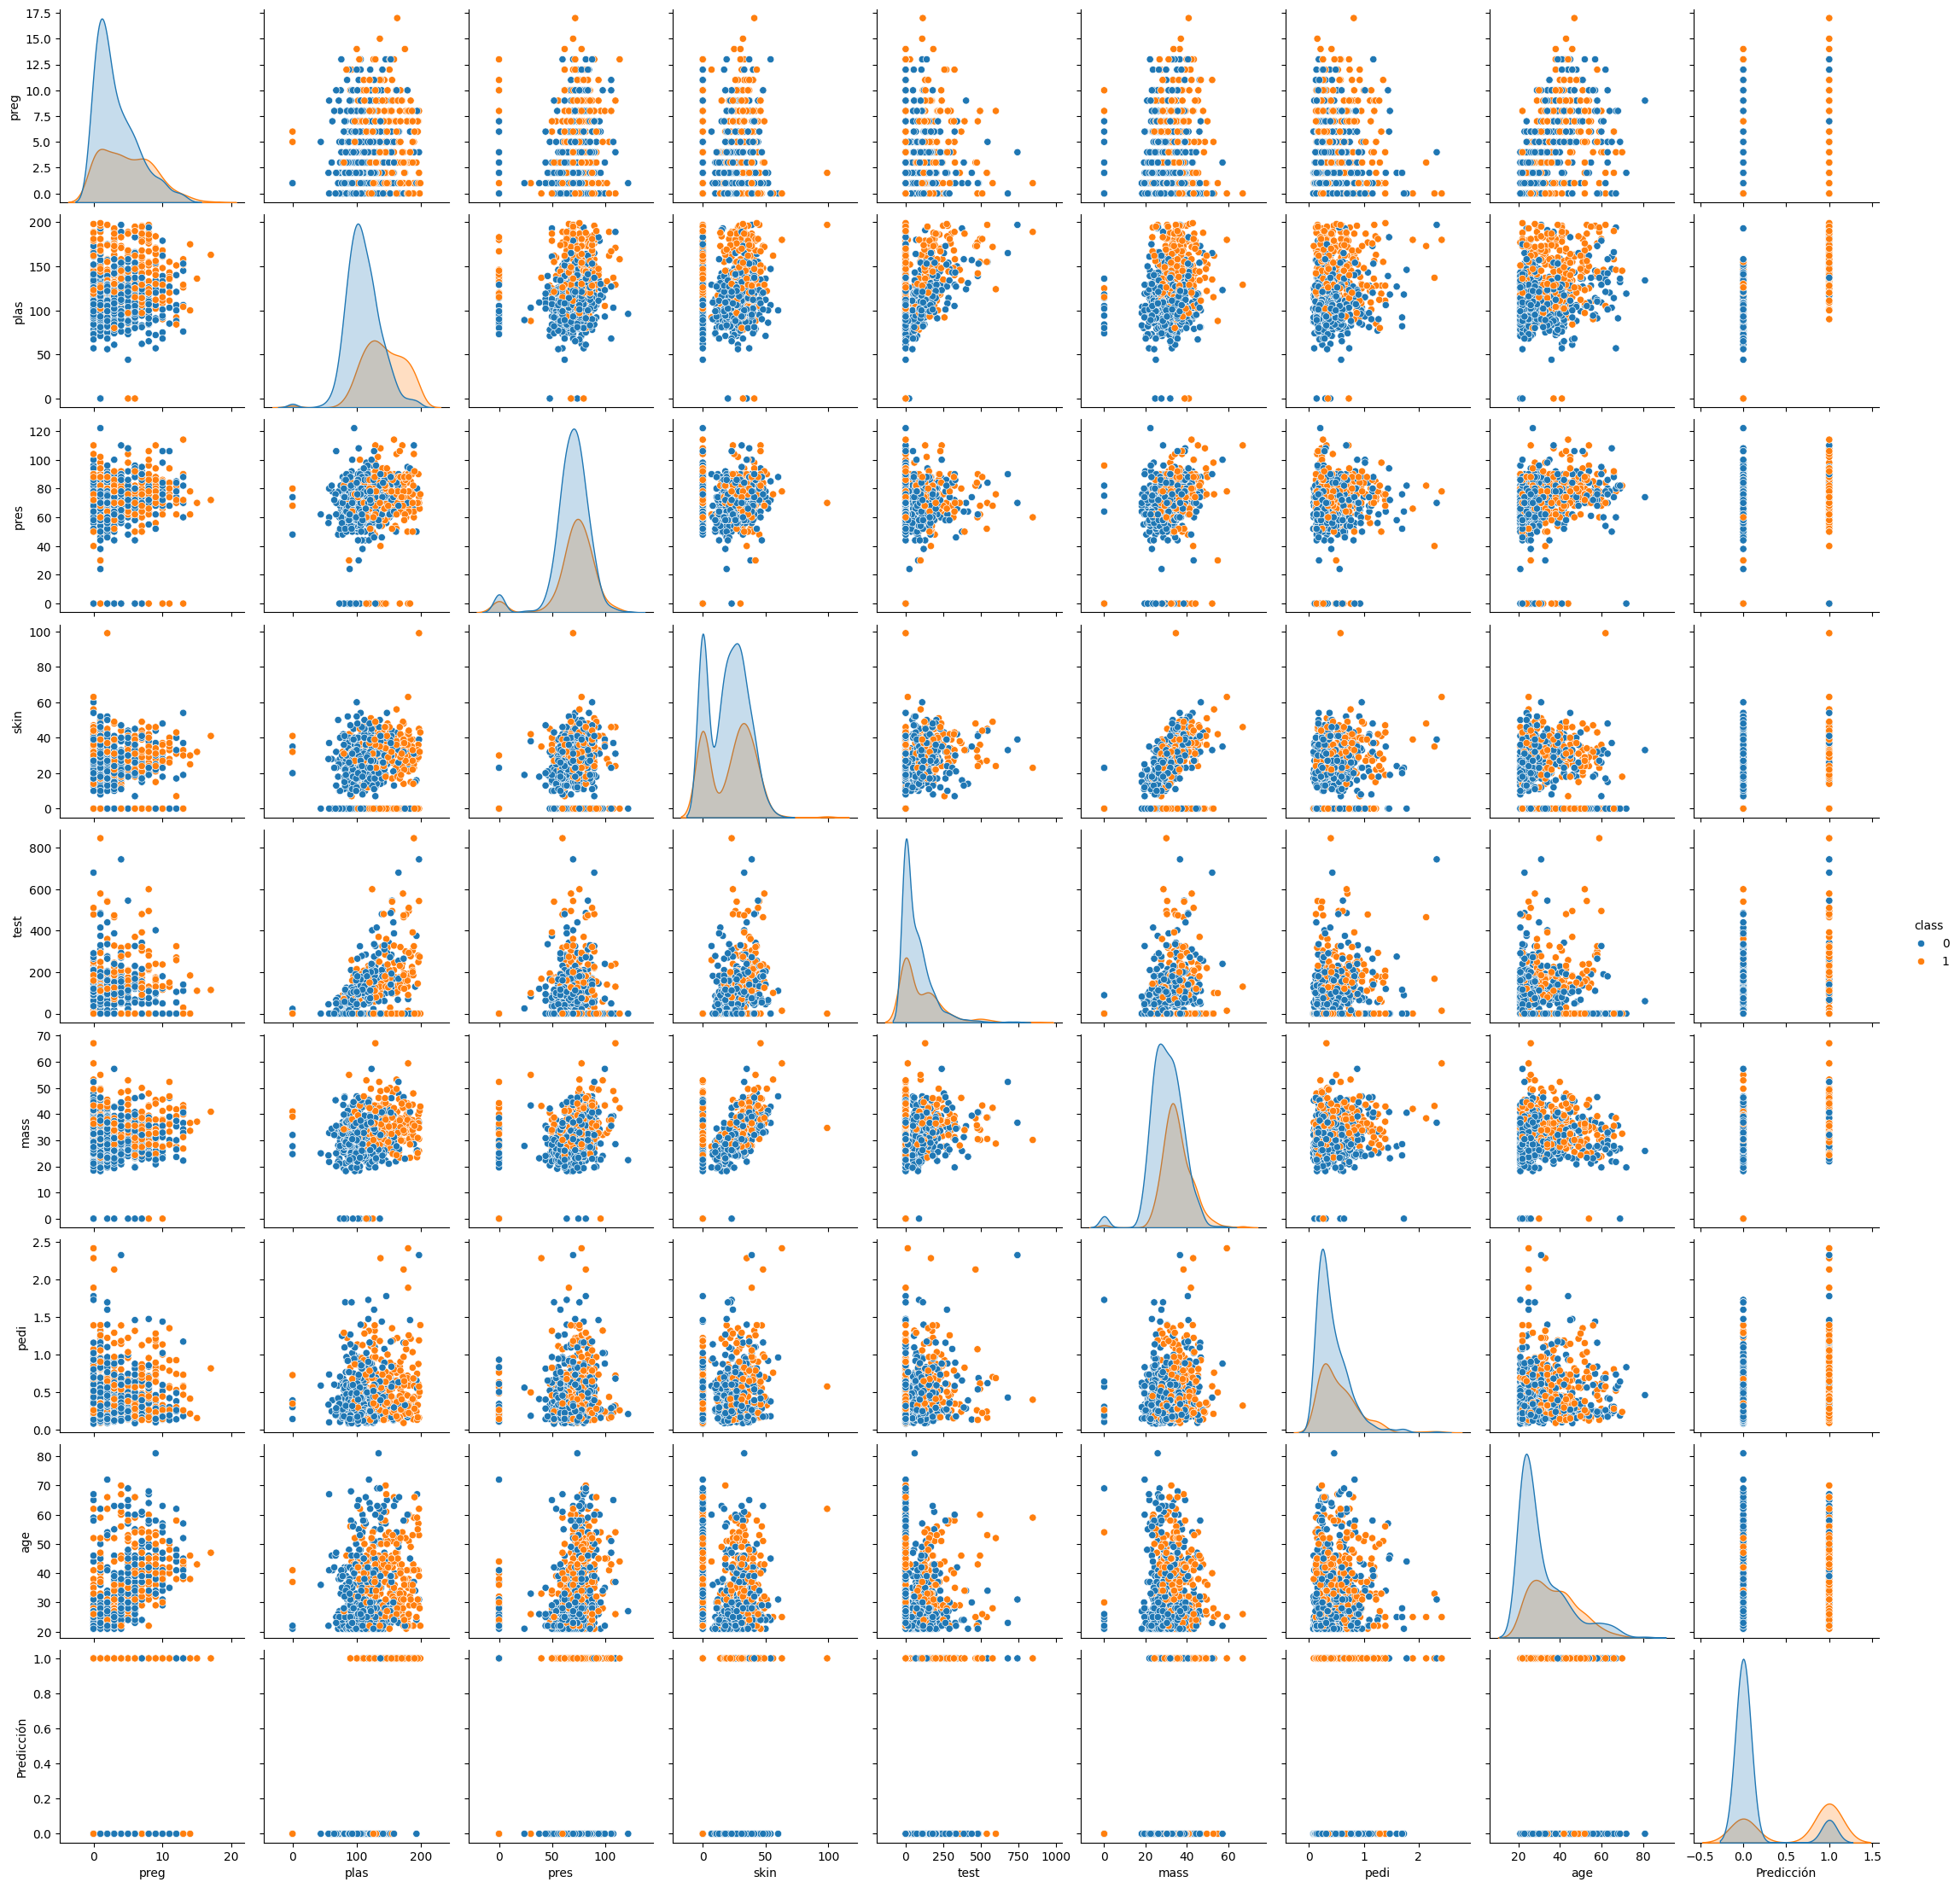

In [28]:
sns.pairplot(df, hue='class')

### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [5]:
# Separar características (X) y etiquetas (y)
X = df.drop('class', axis=1)
y = df['class']

In [6]:
# Establecemos la semilla para reproducibilidad
RANDOM_SEED = 42

In [7]:
kfold = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

estimator = DecisionTreeClassifier(max_depth=3,random_state=RANDOM_SEED)

bag_clf = BaggingClassifier(
    estimator = estimator,
    n_estimators=100, # Cantidad de árboles
    max_samples=100, # Muestras utilizadas en boostrapping
    bootstrap=True, # Usamos boostrapping
    # max_features = 3 # Features que utiliza en el boostrapping. Cuanto más bajo, mejor generalizará y menos overfitting
    random_state=42)


bag_clf.fit(X, y)
y_pred = bag_clf.predict(X)
accuracy_score(y, y_pred)

0.78125

In [9]:
# Validación cruzada
#kfold = 10
scores = cross_val_score(bag_clf, X, y, cv = kfold, scoring ='accuracy')

# Mostrar resultados
bag_clf_mean_accuracy = np.mean(scores)
print(f"Precisión promedio del modelo Bagging: {bag_clf_mean_accuracy:.3f}")

Precisión promedio del modelo Bagging: 0.769


### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [10]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100,
                                 max_leaf_nodes=3,
                                 random_state=RANDOM_SEED)
rnd_clf.fit(X, y)

y_pred_rf = rnd_clf.predict(X)
# np.sum(y_test == y_pred_rf) / len(y_test) 
accuracy_score(y, y_pred_rf)

0.7643229166666666

In [11]:
# Validación cruzada
scores = cross_val_score(rnd_clf, X, y, cv = kfold, scoring ='accuracy')

# Mostrar resultados
rnd_clf_mean_accuracy = np.mean(scores)
print(f"Precisión promedio del modelo Bagging: {rnd_clf_mean_accuracy:.3f}")

Precisión promedio del modelo Bagging: 0.754


### 5. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gbct = GradientBoostingClassifier(max_depth=2,
                                 n_estimators=100,
                                 learning_rate=1.0,
                                 random_state=RANDOM_SEED)
gbct.fit(X, y)


y_pred_gbct = gbct.predict(X)
accuracy_score(y, y_pred_gbct)

0.9947916666666666

In [13]:
# Validación cruzada para Gradient Boosting
gb_scores = cross_val_score(gbct, X, y, cv=kfold, scoring='accuracy')

In [14]:
# Promedio de precisión
gb_mean_accuracy = np.mean(gb_scores)
print(f"Precisión promedio del modelo Gradient Boosting: {gb_mean_accuracy:.3f}")

Precisión promedio del modelo Gradient Boosting: 0.707


### 6. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [15]:
import xgboost

xgb_clas = xgboost.XGBClassifier(
    n_estimators=100,
    random_state=RANDOM_SEED
)

xgb_clas.fit(X, y)
y_pred = xgb_clas.predict(X)
accuracy_score(y, y_pred)

1.0

In [16]:
# Validación cruzada para Gradient Boosting
xgb_scores = cross_val_score(xgb_clas, X, y, cv=kfold, scoring='accuracy')

In [17]:
# Promedio de precisión
xgb_mean_accuracy = np.mean(xgb_scores)
print(f"Precisión promedio del modelo Gradient Boosting: {xgb_mean_accuracy:.3f}")

Precisión promedio del modelo Gradient Boosting: 0.745


### 7. Primeros resultados
Crea un dataframe con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [18]:
# Resultados de los modelos
resultados = {
    "Algoritmo": ["Bagging", "Random Forest", "Gradient Boosting", "XGBoost"],
    "Precisión Promedio": [bag_clf_mean_accuracy, rnd_clf_mean_accuracy, gb_mean_accuracy, xgb_mean_accuracy]  # Incluye los valores calculados previamente
}

# Crear un DataFrame
resultados_df = pd.DataFrame(resultados)

# Ordenar los resultados de mayor a menor
resultados_df = resultados_df.sort_values(by="Precisión Promedio", ascending=False)

# Mostrar el DataFrame ordenado
print(resultados_df)


           Algoritmo  Precisión Promedio
0            Bagging            0.769481
1      Random Forest            0.753811
3            XGBoost            0.744788
2  Gradient Boosting            0.707075


### 9. Hiperparametrización
Vuelve a entrenar los modelos de nuevo, pero esta vez dividiendo el conjunto de datos en train/test y utilizando un gridsearch para encontrar los mejores hiperparámetros.

In [19]:
# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Mejores hiperparámetros: {'estimator__max_depth': 5, 'max_samples': 50, 'n_estimators': 150}
Mejor puntuación (accuracy): 0.7850593096094896
Accuracy Bagging en test: 0.7662337662337663
Reporte de clasificación:
              precision    recall  f1-score   support

No diabético       0.80      0.85      0.82        99
   Diabético       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

ROC-AUC: 0.82
[[84 15]
 [21 34]]


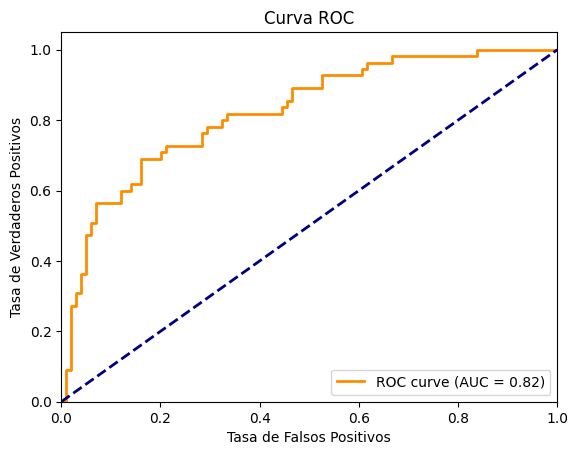

In [20]:
estimator = DecisionTreeClassifier(max_depth=3,random_state=42)

bag_clf = BaggingClassifier(
    estimator = estimator,
    n_estimators=100, # Cantidad de árboles
    max_samples=100, # Muestras utilizadas en boostrapping
    bootstrap=True, # Usamos boostrapping
    # max_features = 3 # Features que utiliza en el boostrapping. Cuanto más bajo, mejor generalizará y menos overfitting
    random_state=RANDOM_SEED)

# Define el rango de hiperparámetros para el Grid Search
param_grid = {
    "n_estimators": [50, 100, 150, 200],
    "max_samples": [2, 5, 10, 20, 30, 40, 50, 60],
    "estimator__max_depth": [3, 5, 7, None]    # Profundidad máxima del árbol
}

# Configura el Grid Search con Cross-Validation
grid_search = GridSearchCV(
    estimator=bag_clf,
    param_grid=param_grid,
    scoring="accuracy",  # Métrica a optimizar
    cv=5,  # Número de divisiones de Cross-Validation
    verbose=2,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ajusta el modelo con los datos
grid_search.fit(X_train, y_train)

# Imprime los mejores hiperparámetros y el mejor puntaje
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación (accuracy):", grid_search.best_score_)

# EXtraer el mejor modelo
best_model = grid_search.best_estimator_

# Realiza predicciones con el modelo optimizado
y_pred = best_model.predict(X_test)

# Calcular métricas de rendimiento (opcional)
from sklearn.metrics import accuracy_score
accuracy_bagging = accuracy_score(y_test, y_pred)
print("Accuracy Bagging en test:", accuracy_bagging)

from sklearn.metrics import classification_report, roc_auc_score

# Generar reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=["No diabético", "Diabético"]))

# Calcular ROC-AUC
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.2f}")

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


predictions = best_model.predict(X_test)
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)

# Generar probabilidades predichas
#y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# Modificar el threshold
#threshold = 0.6  # Cambia este valor según tus necesidades
#y_pred_threshold = np.where(y_pred_proba >= threshold, 1, 0)

from sklearn.metrics import roc_curve, auc


# Obtener las probabilidades predichas para el conjunto de prueba
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Crear la gráfica
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()






In [21]:
rnd_clf = RandomForestClassifier(random_state=RANDOM_SEED)

# Define el rango de hiperparámetros para el Grid Search
param_grid = {
    "n_estimators": [50, 100, 150, 200, 300],
    "max_leaf_nodes": [2, 5, 10, 20, 30, 40],
}

# Configura el Grid Search con Cross-Validation
grid_search = GridSearchCV(
    estimator=rnd_clf,
    param_grid=param_grid,
    scoring="accuracy",  # Métrica a optimizar
    cv=5,  # Número de divisiones de Cross-Validation
    verbose=2,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ajusta el modelo con los datos
grid_search.fit(X_train, y_train)

# Imprime los mejores hiperparámetros y el mejor puntaje
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación (accuracy):", grid_search.best_score_)

# EXtraer el mejor modelo
best_model = grid_search.best_estimator_

# Realiza predicciones con el modelo optimizado
y_pred = best_model.predict(X_test)

# Calcular métricas de rendimiento (opcional)
accuracy_Random_Forest = accuracy_score(y_test, y_pred)
print("Accuracy Bagging en test:", accuracy_Random_Forest)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejores hiperparámetros: {'max_leaf_nodes': 30, 'n_estimators': 100}
Mejor puntuación (accuracy): 0.7834466213514595
Accuracy Bagging en test: 0.7532467532467533


In [22]:
gbct = GradientBoostingClassifier(learning_rate=1.0,
                                 random_state=RANDOM_SEED)

# Define el rango de hiperparámetros para el Grid Search
param_grid = {
    "max_depth": [50, 100, 150, 200],
    "n_estimators": [2, 5, 10, 20],
}

# Configura el Grid Search con Cross-Validation
grid_search = GridSearchCV(
    estimator=gbct,
    param_grid=param_grid,
    scoring="accuracy",  # Métrica a optimizar
    cv=5,  # Número de divisiones de Cross-Validation
    verbose=2,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ajusta el modelo con los datos
grid_search.fit(X_train, y_train)

# Imprime los mejores hiperparámetros y el mejor puntaje
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación (accuracy):", grid_search.best_score_)

# EXtraer el mejor modelo
best_model = grid_search.best_estimator_

# Realiza predicciones con el modelo optimizado
y_pred = best_model.predict(X_test)

# Calcular métricas de rendimiento (opcional)
from sklearn.metrics import accuracy_score
accuracy_Gradient_Boosting = accuracy_score(y_test, y_pred)
print("Accuracy  Gradient Boosting en test:", accuracy_Gradient_Boosting)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores hiperparámetros: {'max_depth': 50, 'n_estimators': 2}
Mejor puntuación (accuracy): 0.7214980674396907
Accuracy  Gradient Boosting en test: 0.7467532467532467


In [23]:
xgb_clas = xgboost.XGBClassifier(random_state=RANDOM_SEED)

# Define el rango de hiperparámetros para el Grid Search
param_grid = {
    #"max_depth": [50, 100, 150, 200],
    "n_estimators": [2, 5, 10, 20],
}

# Configura el Grid Search con Cross-Validation
grid_search = GridSearchCV(
    estimator=xgb_clas,
    param_grid=param_grid,
    scoring="accuracy",  # Métrica a optimizar
    cv=5,  # Número de divisiones de Cross-Validation
    verbose=2,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ajusta el modelo con los datos
grid_search.fit(X_train, y_train)

# Imprime los mejores hiperparámetros y el mejor puntaje
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación (accuracy):", grid_search.best_score_)

# EXtraer el mejor modelo
best_model = grid_search.best_estimator_

# Realiza predicciones con el modelo optimizado
y_pred = best_model.predict(X_test)

# Calcular métricas de rendimiento (opcional)
from sklearn.metrics import accuracy_score
accuracy_XGBoost  = accuracy_score(y_test, y_pred)
print("Accuracy XGBoost en test:", accuracy_XGBoost )

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores hiperparámetros: {'n_estimators': 5}
Mejor puntuación (accuracy): 0.7524590163934426
Accuracy XGBoost en test: 0.7337662337662337


### 10. Conclusiones finales

In [24]:
print(resultados_df)

           Algoritmo  Precisión Promedio
0            Bagging            0.769481
1      Random Forest            0.753811
3            XGBoost            0.744788
2  Gradient Boosting            0.707075


In [25]:
# Resultados de los modelos
resultados2 = {
    "Algoritmo": ["Bagging", "Random Forest", "Gradient Boosting", "XGBoost"],
    "Precisión Promedio": [accuracy_bagging, accuracy_Random_Forest, accuracy_Gradient_Boosting, accuracy_XGBoost]
}

# Crear un DataFrame
resultados_df2 = pd.DataFrame(resultados2)

# Ordenar los resultados de mayor a menor precisión promedio
resultados_df2 = resultados_df2.sort_values(by="Precisión Promedio", ascending=False)

# Imprimir el DataFrame
print(resultados_df2)


           Algoritmo  Precisión Promedio
0            Bagging            0.766234
1      Random Forest            0.753247
2  Gradient Boosting            0.746753
3            XGBoost            0.733766


In [26]:
estimator = DecisionTreeClassifier(max_depth=3,random_state=42)

bag_clf = BaggingClassifier(
    estimator = estimator,
    bootstrap=True, # Usamos boostrapping
    # max_features = 3 # Features que utiliza en el boostrapping. Cuanto más bajo, mejor generalizará y menos overfitting
    random_state=RANDOM_SEED)

# Define el rango de hiperparámetros para el Grid Search
param_grid = {
    "n_estimators": [50, 100, 150, 200],
    "max_samples": [2, 5, 10, 20, 30, 40, 50, 60],
    "estimator__max_depth": [3, 5, 7, None]    # Profundidad máxima del árbol
}

# Configura el Grid Search con Cross-Validation
grid_search = GridSearchCV(
    estimator=bag_clf,
    param_grid=param_grid,
    scoring="accuracy",  # Métrica a optimizar
    cv=5,  # Número de divisiones de Cross-Validation
    verbose=2,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ajusta el modelo con los datos
grid_search.fit(X_train, y_train)

# Imprime los mejores hiperparámetros y el mejor puntaje
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación (accuracy):", grid_search.best_score_)

# EXtraer el mejor modelo
best_model = grid_search.best_estimator_

# Realiza predicciones con el modelo optimizado
y_pred = best_model.predict(X_test)

# Calcular métricas de rendimiento (opcional)
from sklearn.metrics import accuracy_score
accuracy_bagging = accuracy_score(y_test, y_pred)
print("Accuracy Bagging en test:", accuracy_bagging)

# Usar el mejor modelo para predecir en todo el DataFrame
df['Predicción'] = best_model.predict(X)

# Interpretar las clases (Opcional)
df['Es Diabético'] = df['Predicción'].apply(lambda x: 'Sí' if x == 1 else 'No')

# Mostrar el DataFrame con las predicciones
print(df[['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class', 'Predicción', 'Es Diabético']])


Fitting 5 folds for each of 128 candidates, totalling 640 fits
Mejores hiperparámetros: {'estimator__max_depth': 5, 'max_samples': 50, 'n_estimators': 150}
Mejor puntuación (accuracy): 0.7850593096094896
Accuracy Bagging en test: 0.7662337662337663
     preg  plas  pres  skin  test  mass   pedi  age  class  Predicción  \
0       6   148    72    35     0  33.6  0.627   50      1           1   
1       1    85    66    29     0  26.6  0.351   31      0           0   
2       8   183    64     0     0  23.3  0.672   32      1           1   
3       1    89    66    23    94  28.1  0.167   21      0           0   
4       0   137    40    35   168  43.1  2.288   33      1           1   
..    ...   ...   ...   ...   ...   ...    ...  ...    ...         ...   
763    10   101    76    48   180  32.9  0.171   63      0           0   
764     2   122    70    27     0  36.8  0.340   27      0           0   
765     5   121    72    23   112  26.2  0.245   30      0           0   
766     1  

C:\Users\mikel\AppData\Roaming\Python\Python39\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
